##Neural Network Classification with PyTorch

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options)

##1. Make classification data and get it ready

In [ ]:
from sklearn.datasets import make_circles

#Make a 1000 samples
n_samples =1000

##Creaate circles
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [ ]:
len(X),len(y)

(1000, 1000)

In [ ]:
print(f"First five sample of x: \n {X[:5]}")

print(f"First five sample of y: \n {y[:5]}")

First five sample of x: 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First five sample of y: 
 [1 1 1 1 0]


In [ ]:
#Make DataFrame of circle data

import pandas as pd
circles = pd.DataFrame({"X1":X[:,0], "X2":X[:,1], "label":y[:]})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


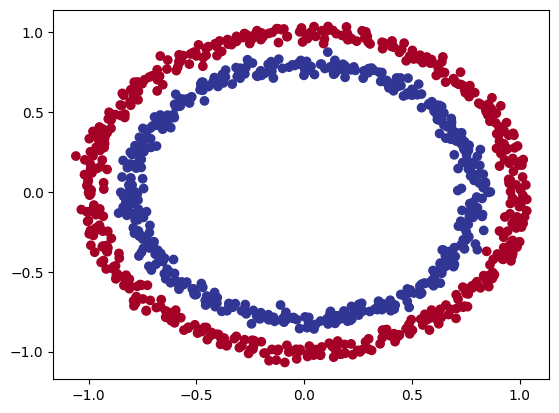

In [ ]:
## Visualize

import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);


###Checking input and output shape

In [ ]:
## Turning our data into tensors and making a training and test split

X.shape,y.shape

((1000, 2), (1000,))

In [ ]:
X


array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

###Turning data into tensors and create train and split

In [ ]:
import torch
torch.__version__

'2.2.1+cu121'

In [ ]:
#3Turn data into tensors
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [ ]:
type(X),X.dtype,y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [ ]:
##Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.2,
                                                 random_state=42)

In [ ]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

###2. Building a model

Let's build a model to classify our blue and red dots

In [ ]:
X_test.dtype

torch.float32

1.Setup device agonistic code so our code will run on accelerator (GPU) if there is one

2.Construct a model (by subclassing nn.Module)

3.Define a loss function and optimer

4.Create a training and test LookupError

In [ ]:
import torch
from torch import nn

##Make device agnostic code
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'


1. Subclass "nn.Module"
2. Create 2 "nn.Linear()" layers that are capable of handling the shapes of our dataclass_transform
3. Defines a 'forward()' method that outlines the forward pass (or forward computation) of the model_selection
4. Instatiate an instance of our model class and send it to the target device

In [ ]:
X_train.shape

torch.Size([800, 2])

In [ ]:
#1. Construct a model that subclasses nn.Module

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    #2. create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2,
                           out_features=5
                           ) ##takes in 2 features and upscales ro 5 features
    self.layer_2= nn.Linear(in_features=5,
                          out_features=1) ##takes in 5 features from previous layer and outputs a single feature (same shape as y)

  #3. define a forward() method that outlines the forward pass
  def forward(self,x):
    return self.layer_2(self.layer_1(x)) #x -> layer_1 -> layer_2 -> output


  #4. Instantiate an instance of our model class and send it to the target device

model_0 =CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
##Let's replicate the model above using nn.sequential
model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.6071, -0.2350],
                      [-0.5926,  0.5942],
                      [ 0.0339, -0.2778],
                      [ 0.5998,  0.3985],
                      [-0.1813, -0.5666]])),
             ('0.bias', tensor([ 0.6186, -0.6224,  0.0663, -0.0231,  0.4867])),
             ('1.weight',
              tensor([[-0.2495,  0.0923, -0.0258, -0.1375,  0.0882]])),
             ('1.bias', tensor([0.0940]))])

In [ ]:
##Make Predictions with the model
with torch.inference_mode():
  untrained_preds=model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)},Shape:{untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions: \n{untrained_preds[:10]}")

Length of predictions: 200,Shape:torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions: 
tensor([[-0.0616],
        [-0.0582],
        [-0.0766],
        [-0.0573],
        [-0.0862],
        [-0.0841],
        [-0.0669],
        [-0.0730],
        [-0.0761],
        [-0.0581]])


### 2.1 Setup loss function and optimizer

Which loss function or optimizer should you use

Again.... this is problem specific.

For example for regression you might want MAE OR MSELoss

FOR CLASSIFICATION YOU MIGHT WANT BINARY CROSS ENTROPY OR CATEGORICAL CROSS ENTROPY

As a reminder, the loss function measures how wrong your model predictions are.

And for optimizers, two of the most common and useful are SGD and Adam

In [ ]:
#Setup the loss function
loss_fn=nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.1 )

In [ ]:
##Calculate accuracy
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

## Training a model

To train  our model,

1. Forward pass

2. Calculate loss

3. Optimizer zero grad

4. Loss backward(backpropagation)

5. Optimizer step (gradient descent)

#3.1 Going from raw logits -> prediction probabilities -> prediction labels

our model outputs are going to be raw **logits**.

we can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (sigmoid for binary and softmax for multiclass classification)

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_logits =model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0616],
        [-0.0582],
        [-0.0766],
        [-0.0573],
        [-0.0862]])

In [ ]:
#Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs= torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4846],
        [0.4855],
        [0.4809],
        [0.4857],
        [0.4785]])

For our prediction probability values, we need to perform a range-style rounding on them:


*   y_pred_probs >= 0.5, y=1 (class 1)
*   y_pred_probs<0.5, y=0 (class 0)



In [ ]:
#Find the predicted labels
y_preds =torch.round(y_pred_probs)

#In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device)))[:5])

#Check for equality
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))



tensor([True, True, True, True, True])


##Building a training and testing loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Set the number of epochs
epochs =100

##Put data to the target device
X_train,y_train =X_train.to(device), y_train.to(device)
X_test,y_test =X_test.to(device), y_test.to(device)


##Build training and evaluation loop
for epoch in range(epochs):
  ##Training
  model_0.train()


  #1. Forward pass
  y_logits =model_0(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  #2. Calculate loss/accuracy
  loss = loss_fn(y_logits,
                 y_train)
  acc=accuracy_fn(y_true=y_train,
                  y_pred=y_pred)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Loss backward (backpropagation)
  loss.backward()


  #5. Optimizer step (gradient descent)
  optimizer.step()


  ##Testing
  model_0.eval()
  with torch.inference_mode():
    #1. Forward pass
    test_logits =model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2. Calculate test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)

    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  #Print out what's happening
  if epoch % 10 ==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss: .5f}, Test acc: {test_acc:.2f}%" )






Epoch: 0 | Loss: 0.69376, Acc: 50.00% | Test loss:  0.69404, Test acc: 50.00%
Epoch: 10 | Loss: 0.69337, Acc: 50.00% | Test loss:  0.69354, Test acc: 50.00%
Epoch: 20 | Loss: 0.69323, Acc: 50.00% | Test loss:  0.69338, Test acc: 50.00%
Epoch: 30 | Loss: 0.69316, Acc: 50.00% | Test loss:  0.69336, Test acc: 50.00%
Epoch: 40 | Loss: 0.69313, Acc: 50.00% | Test loss:  0.69339, Test acc: 50.00%
Epoch: 50 | Loss: 0.69311, Acc: 47.00% | Test loss:  0.69345, Test acc: 43.00%
Epoch: 60 | Loss: 0.69309, Acc: 46.12% | Test loss:  0.69352, Test acc: 47.00%
Epoch: 70 | Loss: 0.69307, Acc: 47.88% | Test loss:  0.69360, Test acc: 45.50%
Epoch: 80 | Loss: 0.69306, Acc: 48.62% | Test loss:  0.69367, Test acc: 47.00%
Epoch: 90 | Loss: 0.69305, Acc: 49.00% | Test loss:  0.69373, Test acc: 47.50%


##4. Make predictions and evaluate the model

From the metrics it looks like our model in=sn't learning anything

So to inspect it let's make some predictions and make them visual

In other words, "Visualize, visualize, visualize"

In [ ]:
import requests

from pathlib import Path

##Download helper functions from Learn PyTorcg repo

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Download helper_functions.py")
  request =requests.get("https://raw.githubusercontent.com/dzinyela/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary




helper_functions.py already exists, skipping download


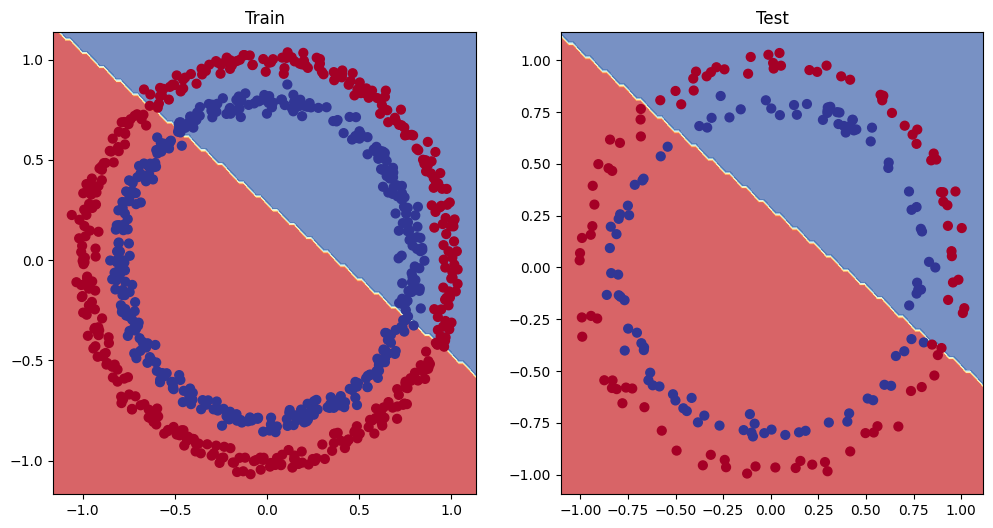

In [ ]:
#Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

###Let's try and improve our model by:


1.   Adding more hidden units: 5-> 10
2.   Increase the number of layers:2->3
3.   Increase the number if epochs 100->1000







In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 =nn.Linear(in_features=2,out_features=10)
    self.layer_2 =nn.Linear(in_features=10,out_features=10)
    self.layer_3 =nn.Linear(in_features=10,out_features=1)

  def forward(self,x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
##Create a loss function
loss_fn=nn.BCEWithLogitsLoss()


##Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [ ]:
##Write a training and evaluatiob loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs =1000

#Put data on the target device
X_train,y_train = X_train.to(device), y_train.to(device)
X_test,y_test = X_test.to(device), y_test.to(device)


for epoch in range(epochs):
  ### Training
  model_1.train()

  #1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))


  #2. Calculate the loss/acc
  loss = loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,
                  y_pred=y_pred)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Loss backward
  loss.backward()

  #5. Optimizer step (gradient descent)
  optimizer.step()


  ###Tessting
  model_1.eval()
  with torch.inference_mode():
    #1. Forward pass
    test_logits=model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2. Calcualte loss
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)


  #Print out what's happening
  if epoch % 100 ==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss: .5f}, Test acc: {test_acc:.2f}%" )





Epoch: 0 | Loss: 0.69396, Acc: 50.88% | Test loss:  0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Acc: 50.38% | Test loss:  0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Acc: 51.12% | Test loss:  0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Acc: 51.62% | Test loss:  0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, Acc: 51.12% | Test loss:  0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Acc: 51.00% | Test loss:  0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Acc: 51.00% | Test loss:  0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Acc: 51.00% | Test loss:  0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Acc: 51.00% | Test loss:  0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Acc: 51.00% | Test loss:  0.69468, Test acc: 46.00%


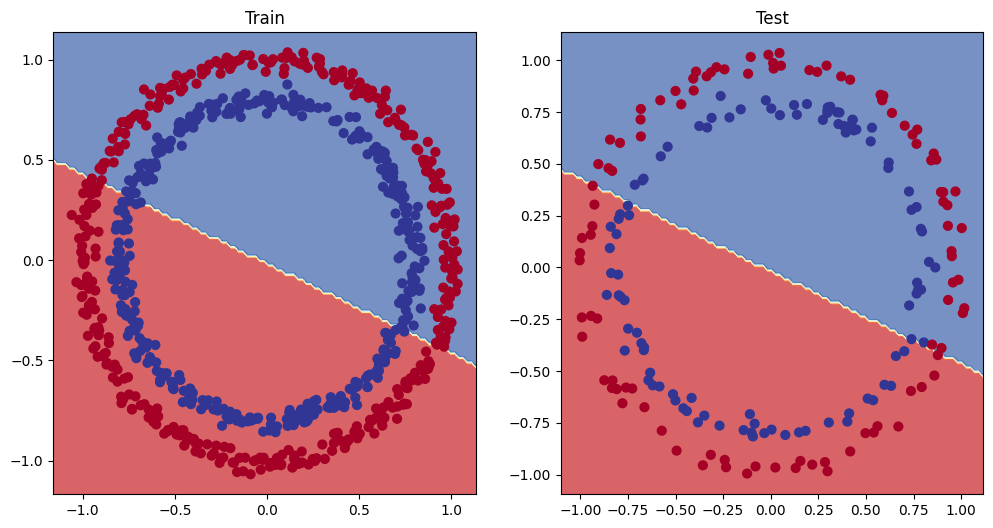

In [ ]:
#plot the decisiob boundary

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)

####**Preparing data to see if our model can fit a straight line**

One way to troubleshoot a larger problem is to test out a smaller problem.

In [ ]:
# Create some data (same as notebool 01)

weight =0.7
bias =0.3
start =0
end =1
step =0.01

##Create data
X_regression  = torch.arange(start, end,step).unsqueeze(dim=1)
y_regression= weight*X_regression + bias ##Linear regression formula (without epsilon)


#Check the data
print(len(X_regression))
X_regression[:5],y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
#Create train and test splits
train_split =int(0.8*len(X_regression))
X_train_regression,y_train_regression =X_regression[:train_split],y_regression[:train_split]
X_test_regression,y_test_regression=X_regression[train_split:],y_regression[train_split:]


#Check the lengths of each
len(X_train_regression),len(X_test_regression),len(y_train_regression),len(y_test_regression)

(80, 20, 80, 20)

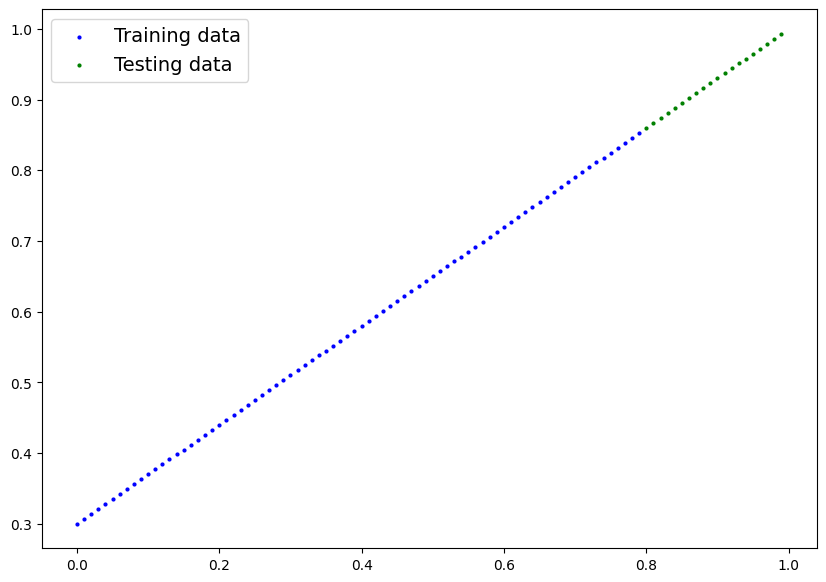

In [ ]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression);

### 5.2 Adjusting `model_1` to fit a straight line

In [ ]:
#Same architechture as model_1 (but using nn.Sequential())

model_2 = nn.Sequential(
    nn.Linear(in_features = 1, out_features=10),
    nn.Linear(in_features = 10, out_features=10),
    nn.Linear(in_features = 10, out_features=1)).to(device)

model_2



Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
#Loss and optimizer
loss_fn=nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [ ]:
## Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#set the number of epochs
epochs =1000

#Put the data on the target device
X_train_regression,y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression,y_test_regression = X_test_regression.to(device), y_test_regression.to(device)


##Training
for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss=loss_fn(y_pred,y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



  #Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred=model_2(X_test_regression)
    test_loss=loss_fn(test_pred,y_test_regression)


  #Print out what's happening:
  if epoch % 100 ==0:
    print(f"Epoch: {epoch} |Loss: {loss:.5f} | Test loss: {test_loss: 0.5f}")

Epoch: 0 |Loss: 0.75986 | Test loss:  0.91103
Epoch: 100 |Loss: 0.02858 | Test loss:  0.00081
Epoch: 200 |Loss: 0.02533 | Test loss:  0.00209
Epoch: 300 |Loss: 0.02137 | Test loss:  0.00305
Epoch: 400 |Loss: 0.01964 | Test loss:  0.00341
Epoch: 500 |Loss: 0.01940 | Test loss:  0.00387
Epoch: 600 |Loss: 0.01903 | Test loss:  0.00379
Epoch: 700 |Loss: 0.01878 | Test loss:  0.00381
Epoch: 800 |Loss: 0.01840 | Test loss:  0.00329
Epoch: 900 |Loss: 0.01798 | Test loss:  0.00360


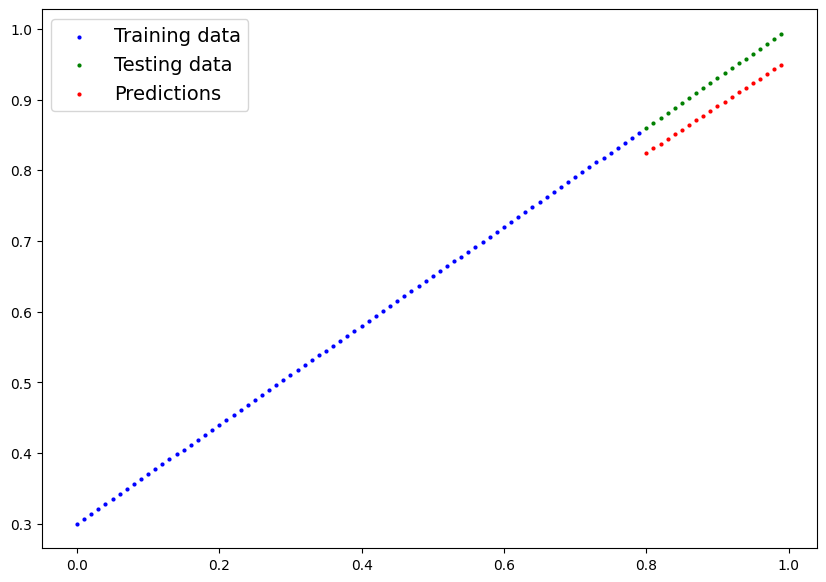

In [ ]:
# Turn on evaluation mode
model_2.eval()

#Make predictions (inference)
with torch.inference_mode():
  y_preds=model_2(X_test_regression)

#Plot data and predictions
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

##6. The missing piece: non-linearity

What patterns could you draw if you wee given an infinite amount of straight and non-straight lines?

or in machine learning terms, an infinite (but really it us finite) of linear and non-linear functions?



### **Recreating non linear data (red and blue circles)**

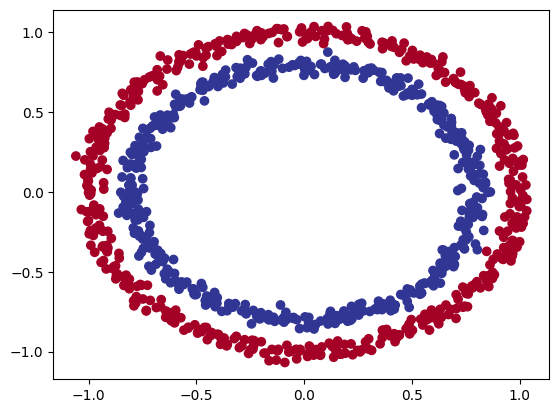

In [ ]:
#Visualize, visualize, visualize

import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [ ]:
from sklearn.datasets import make_circles

#Make a 1000 samples
n_samples =1000

##Creaate circles
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [ ]:
#Convert data to tensors and then to train and test splits

import torch
from sklearn.model_selection import train_test_split


#Turn data into tensors
X=torch.from_numpy(X).type(torch.float32)
y=torch.from_numpy(y).type(torch.float32)

##Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)


X_train[:5],y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### **Building a model with non-linearity**



In [ ]:
#Build a model with non-linear
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 =nn.Linear(in_features=2,out_features=30)
    self.layer_2 =nn.Linear(in_features=30,out_features=30)
    self.layer_3 =nn.Linear(in_features=30,out_features=1)
    self.relu =nn.ReLU()

  def forward(self,x):
    ##Where should we put our non-linear activation functions?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


model_3 = CircleModelV2().to(device)


In [ ]:
##Setup loss and optimizer
loss_fn =nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.1)

In [ ]:
#Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)


#Put all data on target device
X_train,y_train =X_train.to(device),y_train.to(device)
X_test,y_test =X_test.to(device),y_test.to(device)

##Loop through data
epochs =1000

for epoch in range(epochs):
  ##Training
  model_3.train()

  #1. Forward pass
  y_logits =model_3(X_train).squeeze()
  y_pred= torch.round(torch.sigmoid(y_logits)) ##Logits -> prediction probabilities ->prediction labels

  #2. Calculate the loss
  loss = loss_fn(y_logits,y_train) #BCEWithLogitsLoss (takes in logits as first input)
  acc=accuracy_fn(y_true=y_train,
                  y_pred=y_pred)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Loss backward
  loss.backward()


  #5. step the optimizer
  optimizer.step()


  ##Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits =model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss =loss_fn(test_logits,y_test)
    test_acc =accuracy_fn(y_true=y_test,
                          y_pred=test_pred)

   #Print out what's happening:
  if epoch % 100 ==0:
    print(f"Epoch: {epoch} |Loss: {loss:.4f}, Acc: {acc:.2f}% | Test loss: {test_loss: .4f}, Test Acc: {test_acc: .2f}%")






Epoch: 0 |Loss: 0.6943, Acc: 50.00% | Test loss:  0.6939, Test Acc:  50.00%
Epoch: 100 |Loss: 0.6898, Acc: 53.50% | Test loss:  0.6899, Test Acc:  52.50%
Epoch: 200 |Loss: 0.6855, Acc: 62.38% | Test loss:  0.6864, Test Acc:  61.00%
Epoch: 300 |Loss: 0.6789, Acc: 69.25% | Test loss:  0.6811, Test Acc:  66.00%
Epoch: 400 |Loss: 0.6674, Acc: 77.62% | Test loss:  0.6713, Test Acc:  76.50%
Epoch: 500 |Loss: 0.6453, Acc: 89.38% | Test loss:  0.6518, Test Acc:  86.00%
Epoch: 600 |Loss: 0.6025, Acc: 94.38% | Test loss:  0.6141, Test Acc:  91.00%
Epoch: 700 |Loss: 0.5180, Acc: 98.38% | Test loss:  0.5396, Test Acc:  95.50%
Epoch: 800 |Loss: 0.3810, Acc: 99.12% | Test loss:  0.4178, Test Acc:  97.50%
Epoch: 900 |Loss: 0.2372, Acc: 99.75% | Test loss:  0.2846, Test Acc:  99.00%


#### 6.4 Evaluate a model trained with non_linear activation function

In [ ]:
#Make Predictions

model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10],y_test[:10]


(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

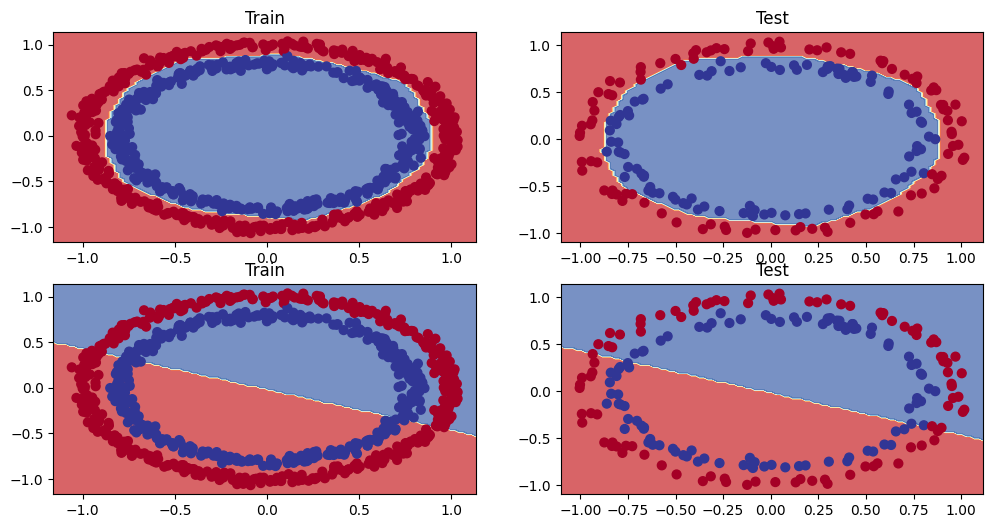

In [ ]:
#Plot decision boundaries

plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
plt.title("Train")
plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(2,2,2)
plt.title("Test")
plot_decision_boundary(model_3,X_test,y_test)


plt.subplot(2,2,3)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(2,2,4)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)

#### 7. Replicating non-linear activation functions



In [ ]:
## Create a tensor

A=torch.arange(-10,10,1,dtype=torch.float32)
A.dtype

torch.float32

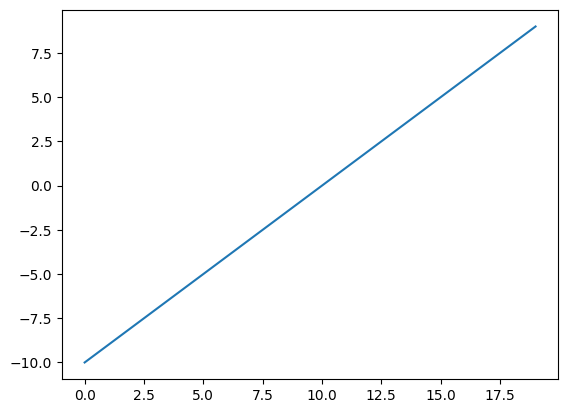

In [ ]:
# Visualize the tensor
plt.plot(A);

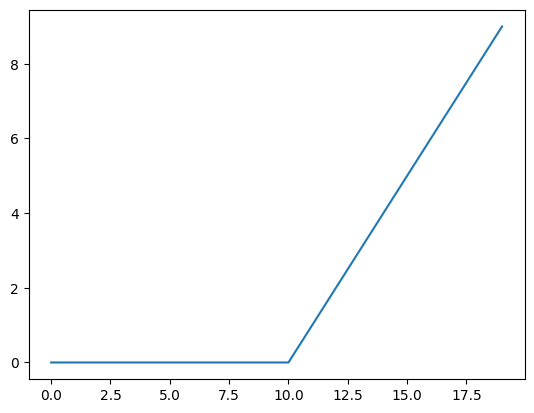

In [ ]:
plt.plot(torch.relu(A));

In [ ]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0),x) #inputs must be tensors

relu(A)


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

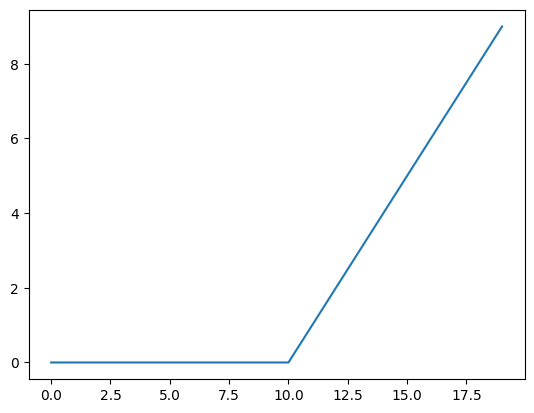

In [ ]:
##Plot ReLU activation function
plt.plot(relu(A));

In [ ]:
def sigmoid(x):
  return 1/(1+torch.exp(-x))


sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

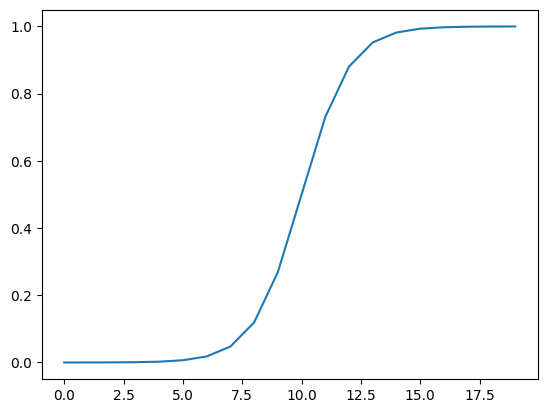

In [ ]:
plt.plot(sigmoid(A));

## **8. Putting it all together with multi-class classification problem**

#### **8.1 Creating a toy multi-class dataset**

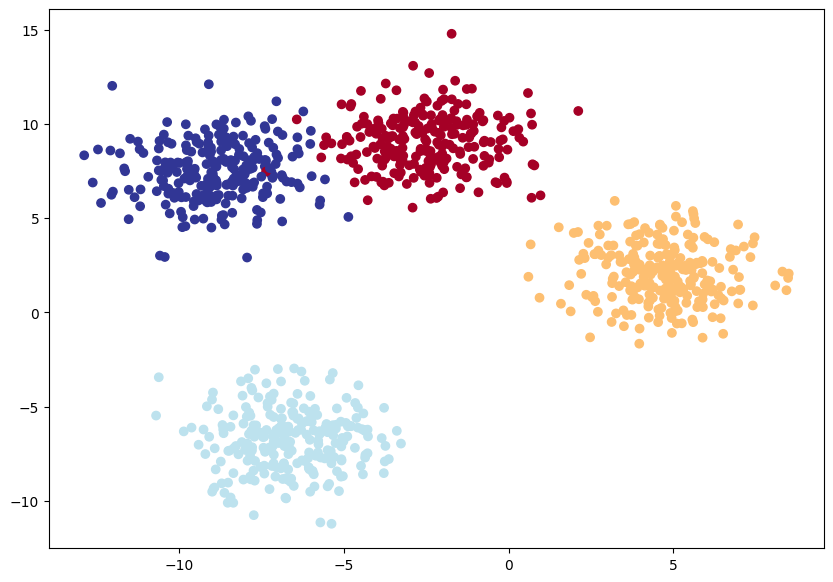

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


#Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED =42


# 1. CREATE MULTI-CLASS DATA
X_blob,y_blob = make_blobs(n_samples=1000,
                           n_features=NUM_FEATURES,
                           centers=NUM_CLASSES,
                           cluster_std=1.5, #give the clusters a little shake up
                           random_state=RANDOM_SEED)


#2. Turn data into tensors
X_blob=torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)


#3.Split into train and test
X_blob_train,X_blob_test,y_blob_train,y_blob_test = train_test_split(X_blob,
                                                                     y_blob,
                                                                     test_size=0.2,
                                                                     random_state= RANDOM_SEED)


#4. PLOT DATA (VISUALIZE,VISUALIZE,VISUALIZE)
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu);


In [ ]:
#Create device agnostic code
device ="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
#Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self,input_features,output_features,hidden_units=8):
    """Initialize multi-class classification model.

  Args:
   input_features(int): Number of input features to the model
   output_features(int): Number of outputs features (number of output classess)
   hidden_units(int): Number of hidden units between layes, default 8


  Returns:

  Example:

  """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
      nn.Linear(in_features=input_features, out_features=hidden_units),
      nn.ReLU(),
      nn.Linear(in_features=hidden_units,out_features=hidden_units),
      nn.ReLU(),
      nn.Linear(in_features=hidden_units,out_features=output_features)

    )

  def forward(self,x):
    return self.linear_layer_stack(x)

#Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

#### **8.3 Create a loss function and an optimizer for a multi-class**

In [ ]:
# Create a  loss function for multiclass classification
loss_fn = nn.CrossEntropyLoss()

#Create an optimizer for multiclass classification
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)

#### 8.5 **Creating a training loop and testing loop for multiclass PyTorch model**

In [ ]:
#Fit the multiclass model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)


#Set number of epochs
epochs=100

X_blob_train,y_blob_train =X_blob_train.to(device), y_blob_train.to(device)
X_blob_test,y_blob_test =X_blob_test.to(device), y_blob_test.to(device)

#Loop through data
for epoch in range(epochs):
  ##Training
  model_4.train()

  y_logits=model_4(X_blob_train)
  y_pred=torch.softmax(y_logits,dim=1).argmax(dim=1)

  loss=loss_fn(y_logits,y_blob_train)
  acc=accuracy_fn(y_true=y_blob_train,
                  y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  ##Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits=model_4(X_blob_test)
    test_preds=torch.softmax(test_logits,dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits,y_blob_test)
    test_acc=accuracy_fn(y_true=y_blob_test,
                         y_pred=test_preds)


  #Print out what's happening:
  if epoch % 10 ==0:
    print(f"Epoch: {epoch} |Loss: {loss:.4f}, Acc: {acc:.2f}% | Test loss: {test_loss: .4f}, Test Acc: {test_acc: .2f}%")








Epoch: 0 |Loss: 1.1588, Acc: 40.38% | Test loss:  1.0755, Test Acc:  48.00%
Epoch: 10 |Loss: 0.6448, Acc: 96.75% | Test loss:  0.6607, Test Acc:  97.50%
Epoch: 20 |Loss: 0.4254, Acc: 98.50% | Test loss:  0.4307, Test Acc:  100.00%
Epoch: 30 |Loss: 0.2529, Acc: 99.12% | Test loss:  0.2451, Test Acc:  99.50%
Epoch: 40 |Loss: 0.1123, Acc: 99.25% | Test loss:  0.1023, Test Acc:  99.50%
Epoch: 50 |Loss: 0.0663, Acc: 99.25% | Test loss:  0.0585, Test Acc:  99.50%
Epoch: 60 |Loss: 0.0507, Acc: 99.25% | Test loss:  0.0429, Test Acc:  99.50%
Epoch: 70 |Loss: 0.0430, Acc: 99.25% | Test loss:  0.0349, Test Acc:  99.50%
Epoch: 80 |Loss: 0.0384, Acc: 99.25% | Test loss:  0.0299, Test Acc:  99.50%
Epoch: 90 |Loss: 0.0352, Acc: 99.25% | Test loss:  0.0266, Test Acc:  99.50%


#### **8.6 Making and evaluating predictions with PyTorch multi-class model**

In [ ]:
# Make predictions

model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

#View the first 10 predictions
y_logits[:10]


tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]])

In [ ]:
#Go from logits -> Prediction probabilities
y_pred_probs = torch.softmax(y_logits,dim=1)
y_pred_probs[:10]



tensor([[1.3437e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1073e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05],
        [1.3372e-03, 1.1504e-05, 3.0644e-04, 9.9834e-01],
        [2.9138e-03, 2.1537e-03, 9.8781e-01, 7.1181e-03],
        [9.9838e-01, 6.0198e-04, 3.4435e-05, 9.7989e-04],
        [2.8147e-04, 1.5016e-04, 9.9882e-01, 7.5044e-04],
        [9.9825e-01, 1.4575e-03, 1.5997e-05, 2.7210e-04]])

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [ ]:
# Go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probs,dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

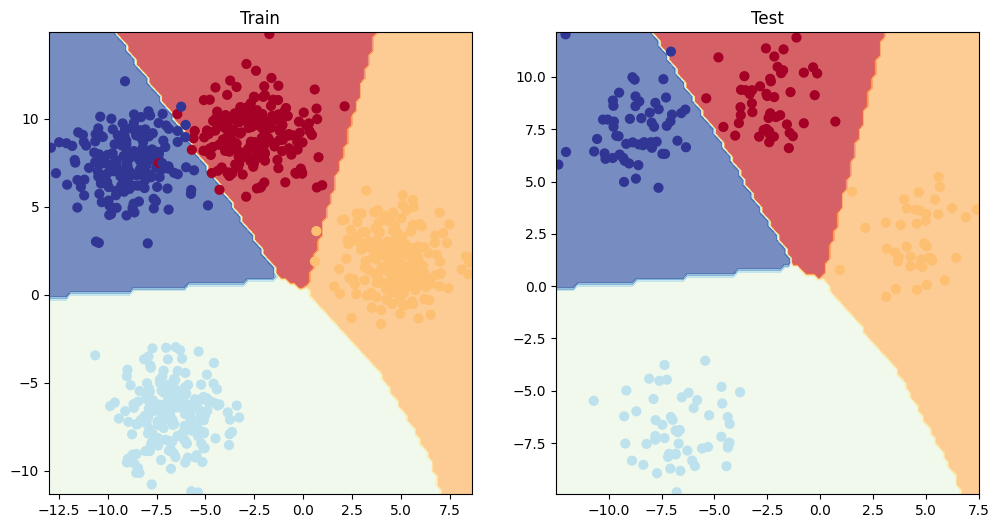

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4,X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4,X_blob_test,y_blob_test)

In [ ]:
!pip install torchmetrics

In [ ]:
from torchmetrics import Accuracy

# Setup metric
torchmetric_accuracy = Accuracy(task='multiclass',num_classes=4).to(device)

# Calculate accuracy
accuracy = torchmetric_accuracy(y_preds, y_blob_test)
accuracy


tensor(0.9950)

In [ ]:
from torchmetrics import Recall

# Setup metric
torchmetric_recall = Recall(task='multiclass',average='micro',num_classes=4).to(device)

# Calculate recall
recall = torchmetric_recall(y_preds, y_blob_test)
recall

tensor(0.9950)